In [1]:
import pandas as pd
merged_df = pd.read_csv('Merged_DatasetV2.csv')
merged_df.head()


/var/folders/rf/qbnw5dmn5dq1gms0pls5p4b40000gn/T/ipykernel_3643/647249361.py:2: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Merged_DatasetV2.csv')


,Unnamed: 0,id,type,name,city,state,county,country,lifespan_years,status,services_offered
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,Columbia (CBS) Studio ‘B’,Test Restaurant,New York,NaN,US,NaN,Active,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,New Theatre Oxford,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,Santuario della Beata Vergine di Ariadello,Genivolta,NaN,NaN,IT,359.0,Active,NaN
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,ROKU-st,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,Rätschenmühle,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN


In [2]:
# Drop rows where 'services_offered' is null
merged_df = merged_df.dropna(subset=['services_offered'])

# Drop the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0', 'id', 'name','lifespan_years'])

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,Active,recorded at


In [3]:
# Split the 'services_offered' column by commas and explode the dataframe
merged_df['services_offered'] = merged_df['services_offered'].str.split(', ')
merged_df = merged_df.explode('services_offered')

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,Active,recorded at


In [4]:
merged_df['services_offered'].value_counts()

services_offered
recorded at              11660
mixed at                  3304
engineered at             1143
edited at                  279
produced at                265
premiere                   240
video shot at              104
arranged at_recording       53
composed at                 44
remixed at                  35
written at                  32
commissioned                29
lyrics written at            8
dedication                   5
arranged at_work             3
revised at                   2
Name: count, dtype: int64

In [5]:
# Impute missing values
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:
        merged_df[column].fillna(0, inplace=True)
    elif merged_df[column].dtype == 'object':
        merged_df[column].fillna('Missing', inplace=True)

# Display the updated dataframe
merged_df.head()

/var/folders/rf/qbnw5dmn5dq1gms0pls5p4b40000gn/T/ipykernel_3643/2411612687.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna('Missing', inplace=True)


,type,city,state,county,country,status,services_offered
15520,Other,Los Jarales,Missing,Missing,VE,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,Missing,US,Ended,engineered at
15525,Venue,Shimokitazawa Eki,Missing,Missing,JP,Active,recorded at


In [38]:
import prince




# Select the columns for MCA
mca_columns = ['type', 'status', 'services_offered']

# Perform MCA
mca = prince.MCA(n_components=27, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(merged_df[mca_columns])

# Transform the data
mca_transformed = mca.transform(merged_df[mca_columns])

# Display the transformed data
mca_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
15520,0.659767,0.441410,1.233396,-0.766231,-0.411001,-0.386277,-0.286422,0.353362,0.321102,-0.013842,...,0.107025,-0.240201,-0.356781,0.004104,-0.148400,0.183767,-0.225529,-0.342937,0.982337,-1.320126
15521,0.689759,-0.102731,-0.296865,0.027988,-0.089993,0.067846,0.018751,0.047214,-0.221693,-0.196650,...,0.419456,0.091561,-0.028335,0.151908,-0.145710,-0.048106,0.174452,-0.375663,-0.093283,0.174273
15522,0.659767,0.441410,1.233396,-0.766231,-0.411001,-0.386277,-0.286422,0.353362,0.321102,-0.013842,...,0.107025,-0.240201,-0.356781,0.004104,-0.148400,0.183767,-0.225529,-0.342937,0.982337,-1.320126
15524,-0.463379,-1.938450,0.109049,0.301915,0.135084,-0.057392,0.019026,0.976969,0.249232,-0.148341,...,-0.045073,-0.587706,0.352101,0.371497,0.975295,-0.100826,0.166950,0.344331,0.096204,-0.137428
15525,0.689759,-0.102731,-0.296865,0.027988,-0.089993,0.067846,0.018751,0.047214,-0.221693,-0.196650,...,0.419456,0.091561,-0.028335,0.151908,-0.145710,-0.048106,0.174452,-0.375663,-0.093283,0.174273


In [39]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.511,5.28%,5.28%
1,0.397,4.11%,9.39%
2,0.371,3.83%,13.22%
3,0.367,3.79%,17.01%
4,0.359,3.71%,20.72%
5,0.349,3.61%,24.33%
6,0.346,3.58%,27.91%
7,0.340,3.52%,31.42%
8,0.338,3.50%,34.92%


In [40]:
# Get the category contributions from MCA
category_contributions = mca.column_coordinates(merged_df[mca_columns])

# Create a dataframe to store the top 10 feature contributions for each component
top_10_contributions_df = pd.DataFrame()

# Loop through each component and get the top 10 feature contributions
for i in range(27):
    top_10_contributions = category_contributions.iloc[:, i].abs().sort_values(ascending=False).head(10)
    top_10_contributions_df[f'Component_{i+1}'] = top_10_contributions.index

# Display the dataframe
top_10_contributions_df

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27
0,services_offered__dedication,services_offered__revised at,services_offered__revised at,services_offered__revised at,services_offered__lyrics written at,services_offered__dedication,services_offered__remixed at,services_offered__revised at,services_offered__dedication,services_offered__revised at,...,services_offered__revised at,services_offered__revised at,services_offered__revised at,services_offered__lyrics written at,services_offered__revised at,services_offered__remixed at,services_offered__dedication,services_offered__premiere,services_offered__commissioned,services_offered__revised at
1,services_offered__premiere,type__Pressing plant,services_offered__lyrics written at,services_offered__commissioned,services_offered__premiere,type__Festival stage,type__Amphitheatre,services_offered__lyrics written at,services_offered__revised at,services_offered__written at,...,services_offered__dedication,type__Pressing plant,services_offered__written at,type__Pressing plant,type__Pressing plant,type__Amphitheatre,services_offered__lyrics written at,type__Festival stage,services_offered__revised at,services_offered__lyrics written at
2,services_offered__revised at,services_offered__arranged at_work,services_offered__video shot at,services_offered__dedication,type__Club,services_offered__lyrics written at,services_offered__dedication,type__Pressing plant,services_offered__lyrics written at,type__Pressing plant,...,type__Pressing plant,services_offered__dedication,type__Park,type__Festival stage,services_offered__lyrics written at,services_offered__dedication,services_offered__revised at,type__Park,services_offered__dedication,services_offered__video shot at
3,services_offered__commissioned,services_offered__commissioned,services_offered__written at,type__Educational institution,type__Festival stage,services_offered__revised at,services_offered__lyrics written at,type__Club,type__Festival stage,type__Festival stage,...,type__Festival stage,type__Festival stage,services_offered__arranged at_work,services_offered__written at,services_offered__dedication,services_offered__lyrics written at,type__Festival stage,type__Concert hall / Theatre,type__Educational institution,services_offered__commissioned
4,services_offered__video shot at,type__Club,services_offered__composed at,services_offered__composed at,type__Concert hall / Theatre,services_offered__produced at,services_offered__revised at,services_offered__written at,type__Pressing plant,type__Park,...,services_offered__arranged at_work,services_offered__composed at,type__Pressing plant,services_offered__arranged at_work,type__Club,services_offered__commissioned,services_offered__produced at,services_offered__revised at,services_offered__composed at,services_offered__written at
5,services_offered__mixed at,status__Ended,services_offered__dedication,services_offered__written at,services_offered__dedication,services_offered__remixed at,services_offered__commissioned,services_offered__composed at,type__Park,services_offered__lyrics written at,...,services_offered__composed at,services_offered__lyrics written at,services_offered__dedication,services_offered__revised at,type__Indoor arena,services_offered__revised at,type__Amphitheatre,services_offered__produced at,services_offered__written at,services_offered__composed at
6,type__Club,type__Park,services_offered__commissioned,services_offered__video shot at,services_offered__composed at,type__Amphitheatre,type__Festival stage,type__Indoor arena,services_offered__written at,services_offered__composed at,...,services_offered__written at,services_offered__written at,services_offered__lyrics written at,services_offered__commissioned,services_offered__composed at,services_offered__written at,servic

In [41]:
category_contributions


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
type__Amphitheatre,0.833132,1.075654,-0.392635,-1.396010,0.672001,-4.084190,9.874664,0.051727,0.358319,0.310023,...,0.171702,-0.361631,0.015273,-0.538749,-0.166340,-9.834449,-2.922179,1.442821,0.973489,0.214193
type__Club,1.391184,-3.128734,1.719119,-0.462744,4.548332,-1.129730,-0.550490,-4.359672,0.705035,0.013410,...,0.038621,1.384586,0.630926,-2.321381,3.190965,0.757695,-2.088928,1.856839,-0.359306,-1.046139
type__Concert hall / Theatre,1.125326,-0.186420,0.012580,0.299913,-2.993742,1.503344,0.744956,-2.395873,0.396301,2.149617,...,-3.127727,-0.087220,1.465242,-1.720368,1.906512,-0.747655,1.918244,-2.433702,0.353946,0.185065
type__Educational institution,0.958696,1.624888,1.699901,4.197432,0.950256,-0.015870,0.275460,0.389046,-0.042289,0.325716,...,-0.328038,-0.211030,0.095051,-0.185180,-0.461816,-0.199123,-0.135872,0.014864,-3.638870,-2.246274
type__Festival stage,0.694496,0.721777,-1.460701,-1.408392,3.639233,7.408802,1.461973,1.486752,9.543153,10.603387,...,8.796349,-11.451492,-0.242241,-11.201695,-1.421385,0.046805,6.073830,4.123664,0.140466,0.953765
type__Indoor arena,0.982050,-0.931072,-0.711263,-0.548171,1.663482,0.549201,-0.011500,2.675683,0.644525,0.477948,...,-2.283011,0.297587,-1.469944,-1.485724,-3.080318,0.338943,0.040425,1.068274,0.053935,0.768604
type__Missing,0.050755,1.242170,-0.025974,-0.673102,0.769356,1.461996,0.308987,-0.431025,-0.127124,-0.983363,...,-0.269413,0.751945,-0.188364,0.552095,0.597480,-0.154685,1.407962,1.462537,0.312004,-0.238562
type__Other,0.972733,0.510057,2.445985,-1.292092,-0.831055,-0.588911,-0.460679,0.640859,0.601926,-0.032730,...,0.138357,-0.420126,-0.603697,0.032855,-0.240761,0.340385,-0.469639,-0.401565,1.643704,-2.016991
type__Park,0.867067,1.678590,0.606219,-1.943881,1.787969,-0.482148,-0.886751,0.862573,-6.906958,6.741423,...,0.465459,-0.846517,10.210719,1.837107,-2.192845,0.849010,-0.665501,2.476106,1.310626,-0.760195
type__Pressing plant,-0.222663,-5.861468,0.811869,0.990612,2.391539,0.806691,-0.423388,-13.142697,-8.915201,-11.869132,...,-12.033280,-35.303871,-4.604454,22.086355,14.814454,-0.629997,1.446294,-0.574122,-1.921170,0.089066


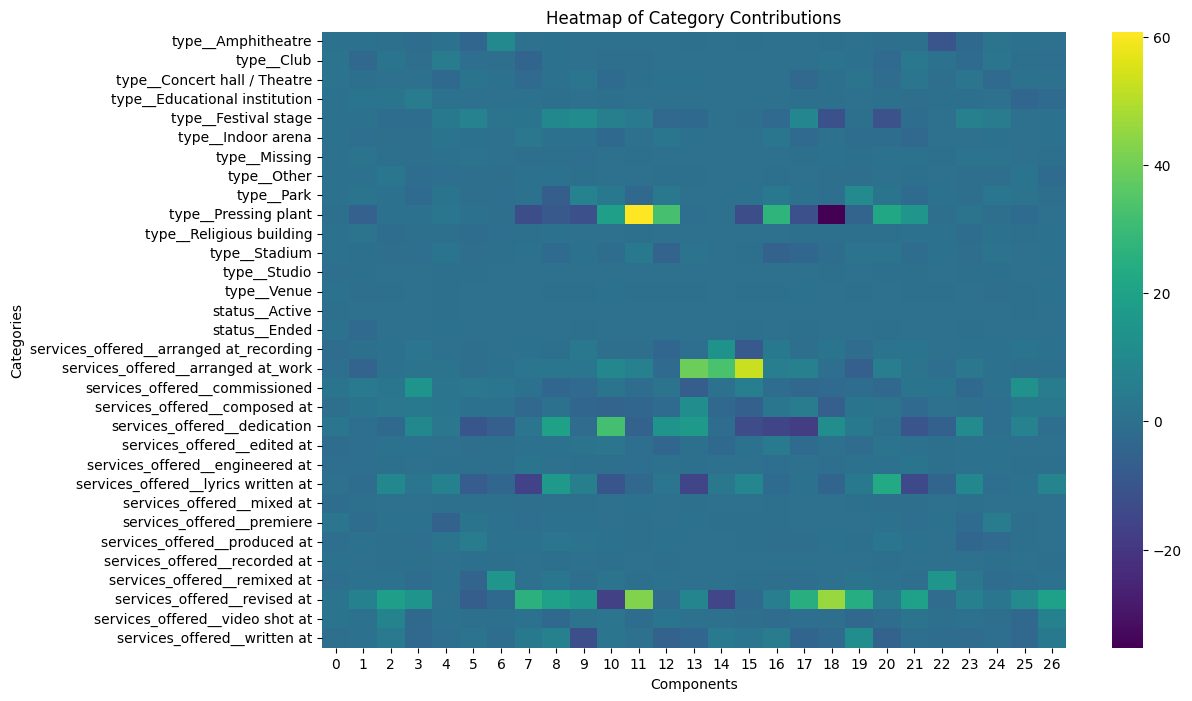

In [42]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a heatmap of category contributions
plt.figure(figsize=(12, 8))
sns.heatmap(category_contributions, cmap='viridis', annot=False)
plt.title('Heatmap of Category Contributions')
plt.xlabel('Components')
plt.ylabel('Categories')
plt.show()